In [ ]:
import importlib
import 
import os
sys.path.append('/app/src')

import src.myutilities.constants as c
importlib.reload(c)

sys.path.append(c.SOURCE_PATH)

import src.myutilities.box as box
importlib.reload(box)

import src.myutilities.util as util
importlib.reload(util)

import src.retnet.model as model
importlib.reload(model)

import gc
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [ ]:
%%capture 
#capture prevents output of function calls from being printed (ie, lots of tensorflow verbiage)
data_path = c.QUANTIFICATION_IN_PATH
seed_model = model.SeedModel(c.SEED_MODEL_PATH)
qr_model = model.QrModel(c.QR_MODEL_PATH)

2022-07-08 03:11:51.025926: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-07-08 03:11:51.036608: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200155000 Hz
2022-07-08 03:11:51.038287: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55f6701b2070 executing computations on platform Host. Devices:
2022-07-08 03:11:51.038436: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


['3582']


Would you like to track box #3582? (y) or (n):  y


2022-07-08 03:18:30.112172: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node filtered_detections/map/while/strided_slice_6. Error: Pack node (filtered_detections/map/while/stack) axis attribute is out of bounds: 1
2022-07-08 03:18:30.112431: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node filtered_detections/map/while/strided_slice_4. Error: Pack node (filtered_detections/map/while/stack) axis attribute is out of bounds: 1
2022-07-08 03:18:30.112721: W ./tensorflow/core/grappler/optimizers/graph_optimizer_stage.h:241] Failed to run optimizer ArithmeticOptimizer, stage RemoveStackStridedSliceSameAxis node clipped_boxes/strided_slice_2. Error: Pack node (boxes/stack) axis attribute is out of bounds: 2
2022-07-08 03:18:30.112736: W ./tensorflow/core/grappler/optimizers/graph_

SEED RETINANET processing time:  2.9696383476257324


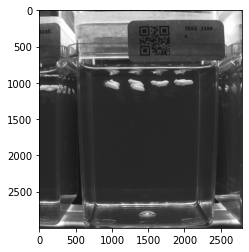

4


How many seeds are in this box? 4


4


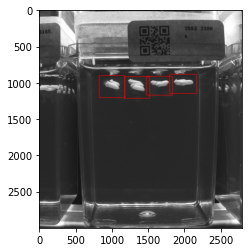

This image will have boxes around all detected seeds. If this looks good, enter 'c' to continue. If one or more seeds were missed, hit 'm' to proceed to manual mode. c


Finding germination frame for seed 1


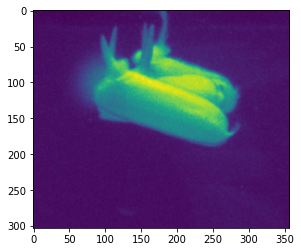

Is germination (b)efore, (a)fter, (h)ere, do you need to (r)estart, or does it not germinate (x)? x
To confirm seed did not germinate, hit (x) again, or any other key to continue searching. x


Finding germination frame for seed 2


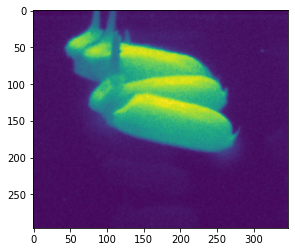

Is germination (b)efore, (a)fter, (h)ere, do you need to (r)estart, or does it not germinate (x)? x
To confirm seed did not germinate, hit (x) again, or any other key to continue searching. x


Finding germination frame for seed 3


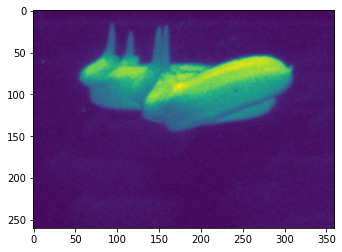

Is germination (b)efore, (a)fter, (h)ere, do you need to (r)estart, or does it not germinate (x)? x
To confirm seed did not germinate, hit (x) again, or any other key to continue searching. x


Finding germination frame for seed 4


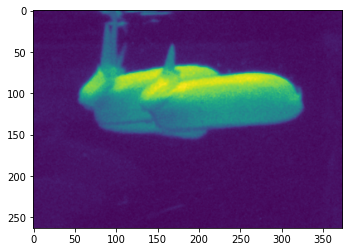

Is germination (b)efore, (a)fter, (h)ere, do you need to (r)estart, or does it not germinate (x)? a


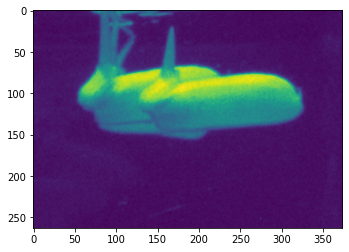

Is germination (b)efore, (a)fter, (h)ere, do you need to (r)estart, or does it not germinate (x)? a


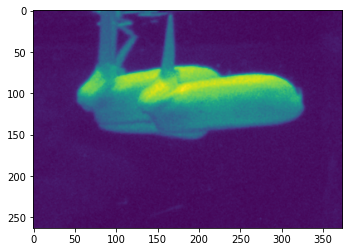

Is germination (b)efore, (a)fter, (h)ere, do you need to (r)estart, or does it not germinate (x)? a


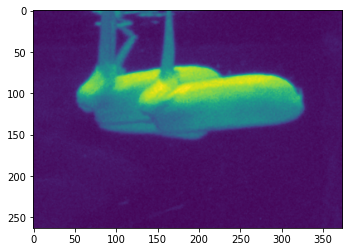

Is germination (b)efore, (a)fter, (h)ere, do you need to (r)estart, or does it not germinate (x)? a


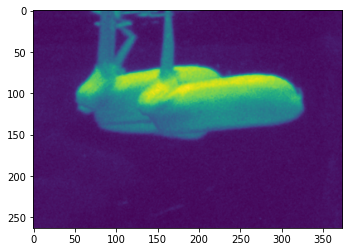

Is germination (b)efore, (a)fter, (h)ere, do you need to (r)estart, or does it not germinate (x)? x
To confirm seed did not germinate, hit (x) again, or any other key to continue searching. x


In [ ]:
# SEED LOCALIZATION AND TIP TRACKING. WORKING 9-18-21.
importlib.reload(box)

box_list = util.listdir_nohidden(os.path.join(data_path, "stabilized"))
outputs = []
print(box_list)

#threshold_multiplier:
#1.3 and 50 can work for rice. rice has been 1.5 (bright lights) and 1.3 or 1.4 (dimmer lights) and 30-50, arabidopsis seemed to work somewhat at 1.4 and 10
#1.2 was working pretty well for rice in high gelzan percent boxes (.5% or above)
for expt in box_list:
    
    while True:
        track = input("Would you like to track box #" + str(expt) + "? (y) or (n): ")
        if track == "y" or track == "n":
            break
        else:
            print("Invalid character")
    if track == "y":
        box_path = os.path.join(data_path, "stabilized", expt, "")
        b = box.Box(box_path)
        b.init_seeds(seed_model, automatic = True) 
        b.germination_detection(save_tip_sample=False, threshold_multiplier= 1.5, automatic = False)
        b.tip_trace_pcv(384, threshold_multiplier = 1.5, bound_radius = 30) 
        b.validate_save_tracking()
        del b
        gc.collect()  

In [ ]:
util.sync_for_rstudio()
util.sync_traced_tips() #NEED TO FIGURE OUT HOW TO SYNC TO BUCKET. CAN'T SIMPLY USE RSYNC TO MOUNTED BUCKET

In [ ]:
util.archive("stabilized")

In [ ]:
#run this if the program crashes
del b
gc.collect()

In [ ]:
util.empty_trash()